# Plan

1. Setup and test plotting distribution
2. Function randomizing network
3. Plot different distributions with randomization

# Setup and Test Plotting

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tqdm
import time
from hybrid_networks_clean import rewire_network, randomize_network_v2

In [23]:
# Plotting functions
def plot_network_degree_distribution(G, title):
    degrees = np.array([degree for node, degree in G.degree()])
    # Create the histogram with a KDE
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))
    sns.histplot(degrees, kde=False, bins=150, stat="count")
    # Calculate the mean
    mean_value = np.mean(degrees)

    # Plot a vertical line at the mean value
    plt.axvline(mean_value, color='b', linestyle='--', linewidth=2)
    plt.text(mean_value + 0.1, plt.ylim()[1] * 0.9, 'Mean: {:.2f}'.format(mean_value), color='b')

    plt.title('Timeline Smooth Histogram for: ' + title)
    plt.xlabel('Degree')
    plt.ylabel('Count')
    plt.xticks(fontsize=8,rotation=20)
    plt.show()
    
def plot_loglog(G,m=10):
  degree_freq = nx.degree_histogram(G)
  degrees = range(len(degree_freq))
  plt.figure(figsize=(12, 8))
  plt.loglog(degrees[m:], degree_freq[m:],'go-')
  plt.xlabel('Degree')
  plt.ylabel('Frequency')

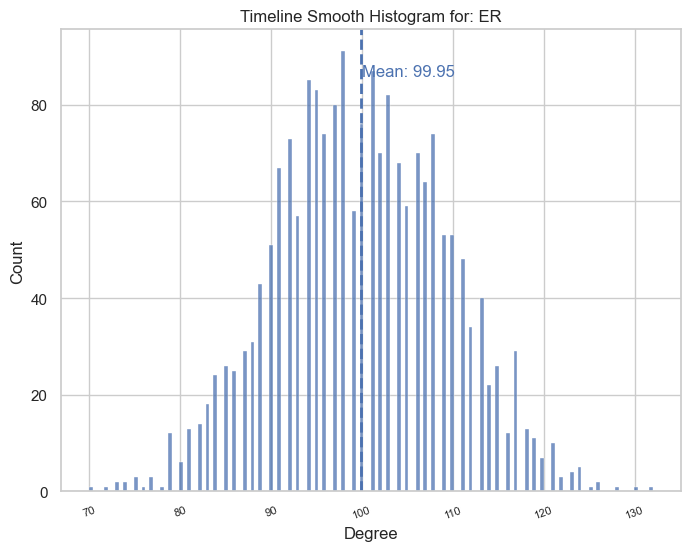

CPU times: user 1.02 s, sys: 44 ms, total: 1.07 s
Wall time: 898 ms


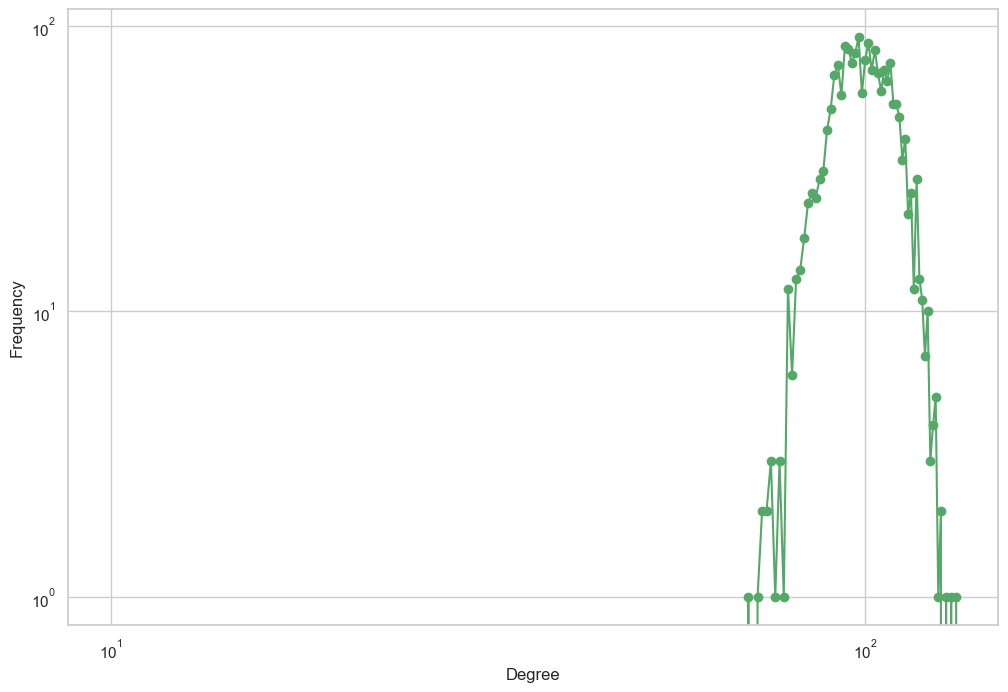

In [24]:
%%time
# Create a graph (example graph)
G_er = nx.gnp_random_graph(2000, 0.05)
# Plot its egree
plot_network_degree_distribution(G_er,'ER')
plot_loglog(G_er,10)

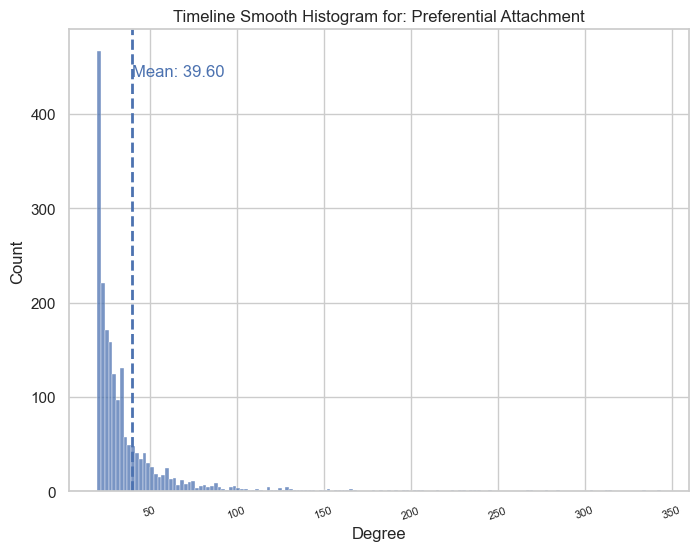

CPU times: user 775 ms, sys: 40.2 ms, total: 815 ms
Wall time: 672 ms


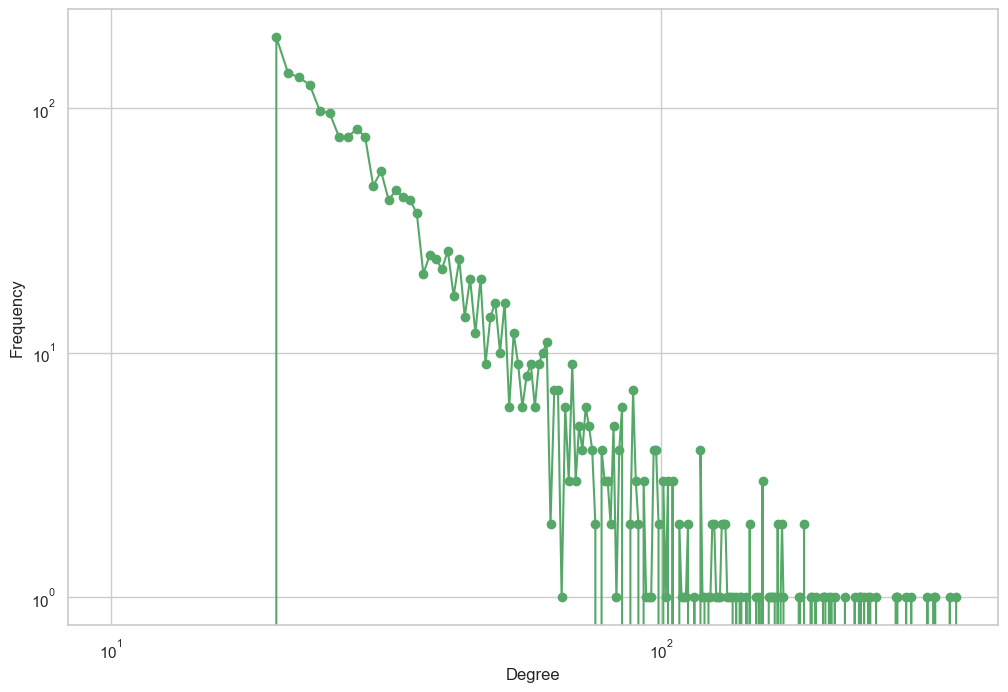

In [25]:
%%time
# Parameters for the graph
n = 2000  # Number of nodes
m = 20    # Number of edges to attach from a new node to existing nodes

# Generate the graph
G_ba = nx.barabasi_albert_graph(n, m)

plot_network_degree_distribution(G_ba,'Preferential Attachment')
plot_loglog(G_ba,m=10)

# Randomizing Network

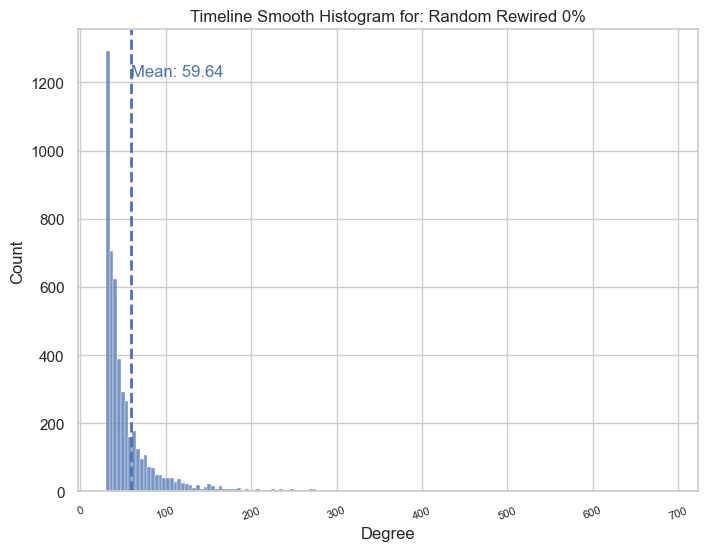

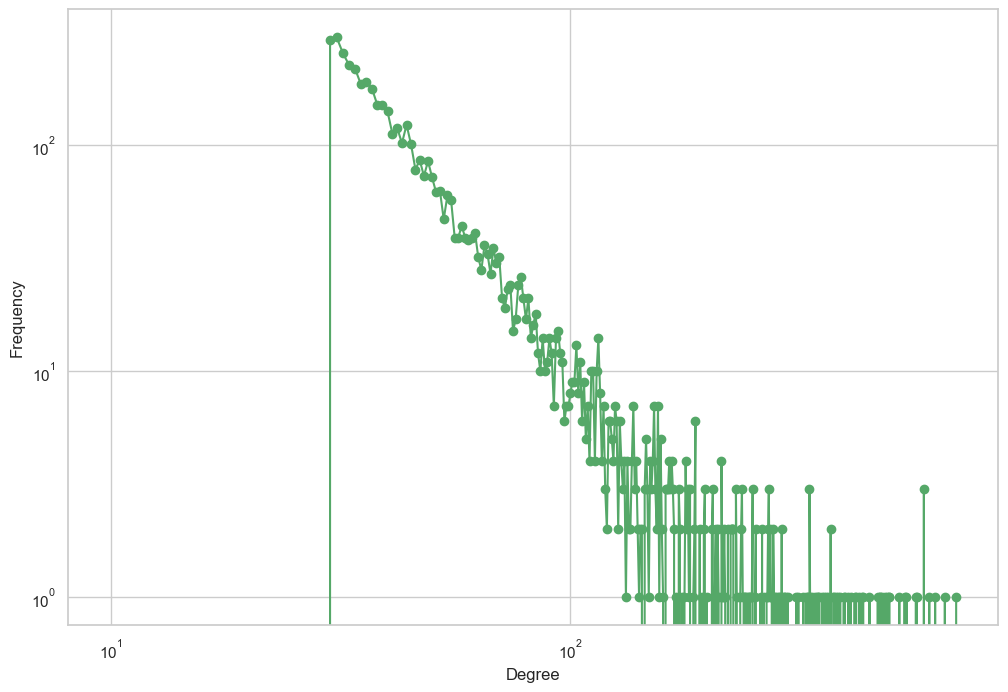

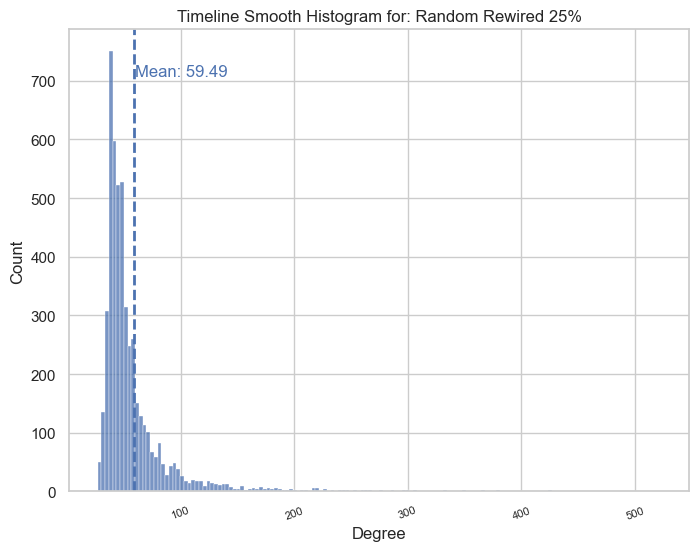

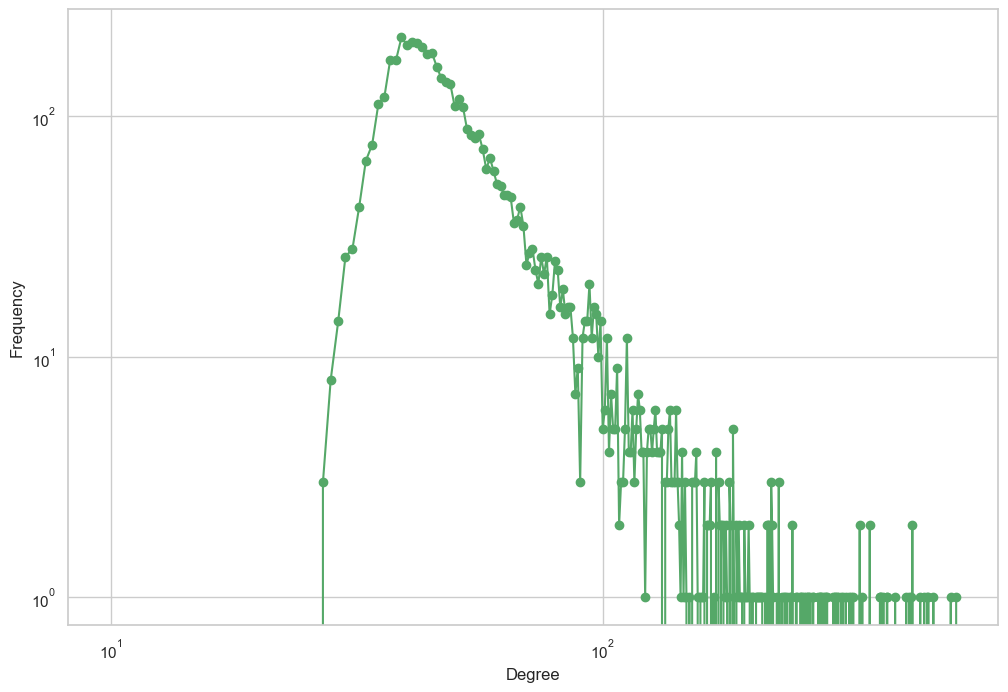

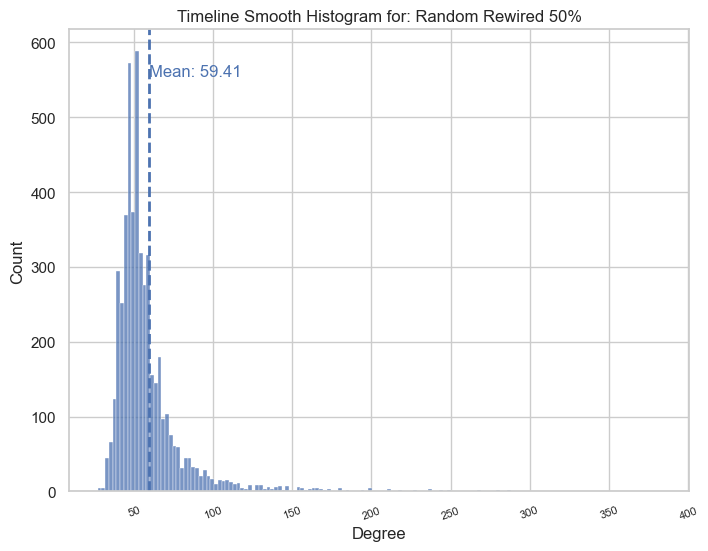

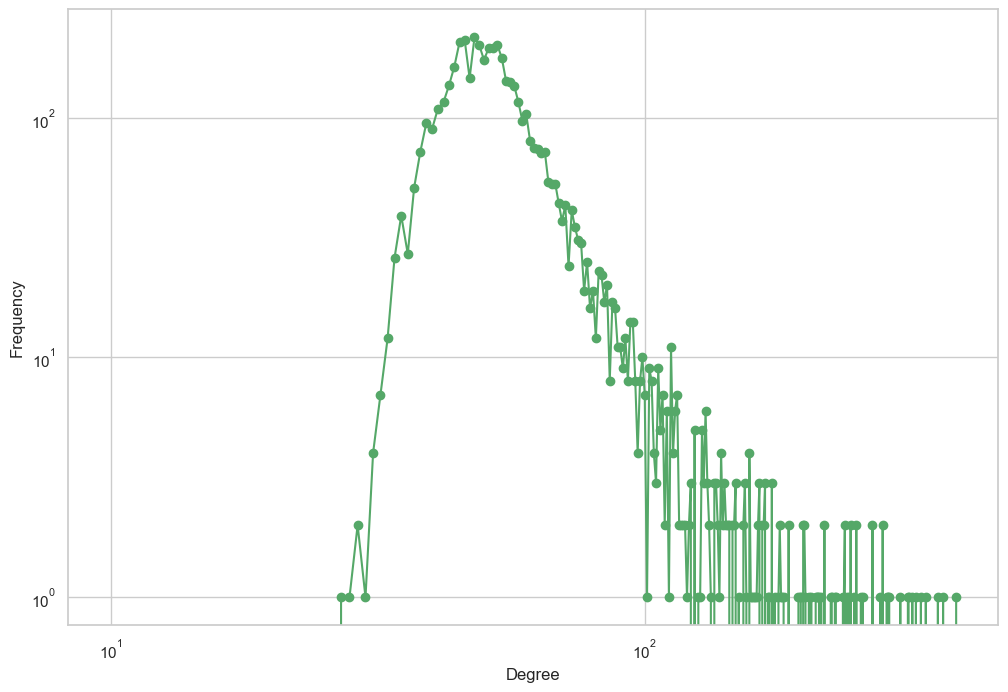

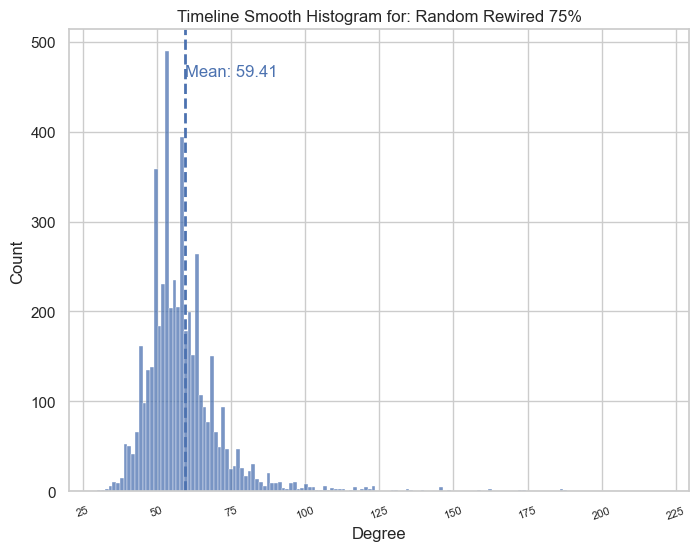

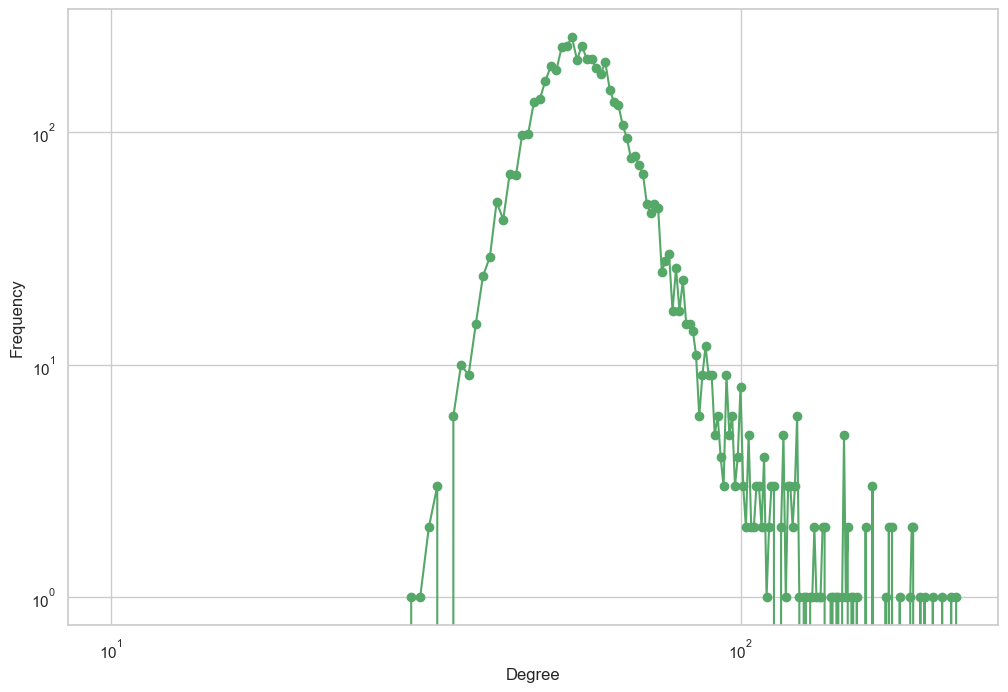

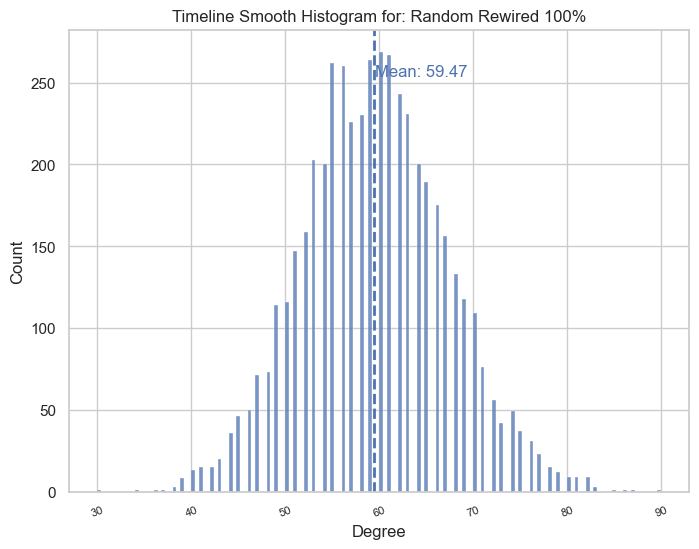

CPU times: user 12 s, sys: 285 ms, total: 12.3 s
Wall time: 11.7 s


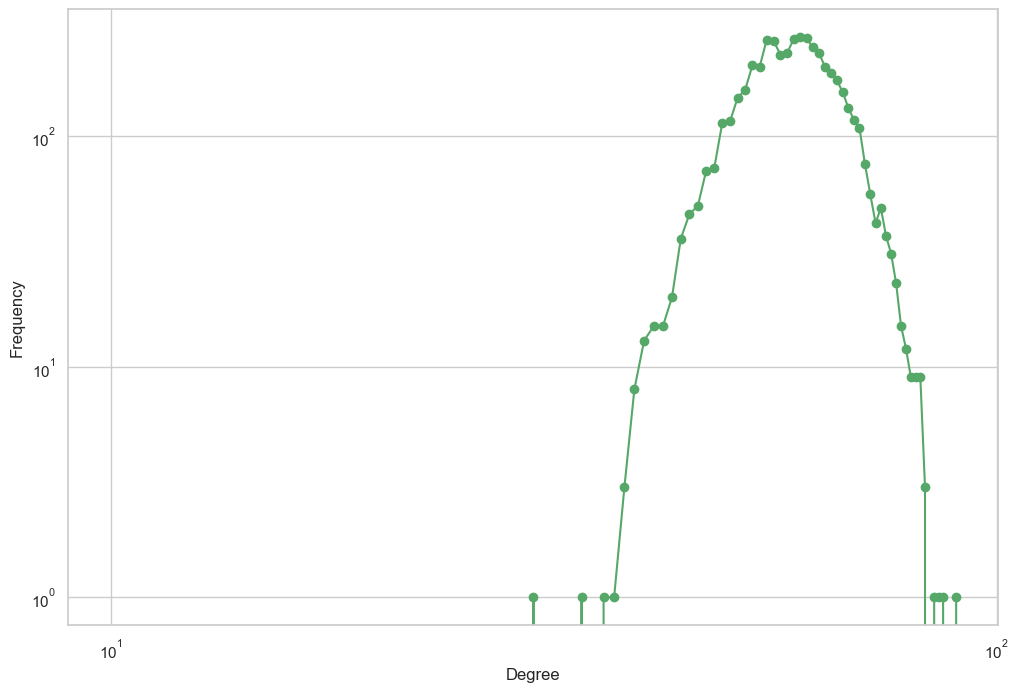

In [26]:
%%time
# Parameters for the graph
n = 5000  # Number of nodes
m = 30    # Number of edges to attach from a new node to existing nodes

# Generate the graph
G_ba = nx.barabasi_albert_graph(n, m)

G_rewired = randomize_network_v2(G_ba, 0)
plot_network_degree_distribution(G_rewired,'Random Rewired 0%')
plot_loglog(G_rewired)
G_rewired = randomize_network_v2(G_ba, 0.25)
plot_network_degree_distribution(G_rewired,'Random Rewired 25%')
plot_loglog(G_rewired)
G_rewired = randomize_network_v2(G_ba, 0.5)
plot_network_degree_distribution(G_rewired,'Random Rewired 50%')
plot_loglog(G_rewired)
G_rewired = randomize_network_v2(G_ba, 0.75)
plot_network_degree_distribution(G_rewired,'Random Rewired 75%')
plot_loglog(G_rewired)
G_rewired = randomize_network_v2(G_ba, 1)
plot_network_degree_distribution(G_rewired,'Random Rewired 100%')
plot_loglog(G_rewired)

# Centralizing Network

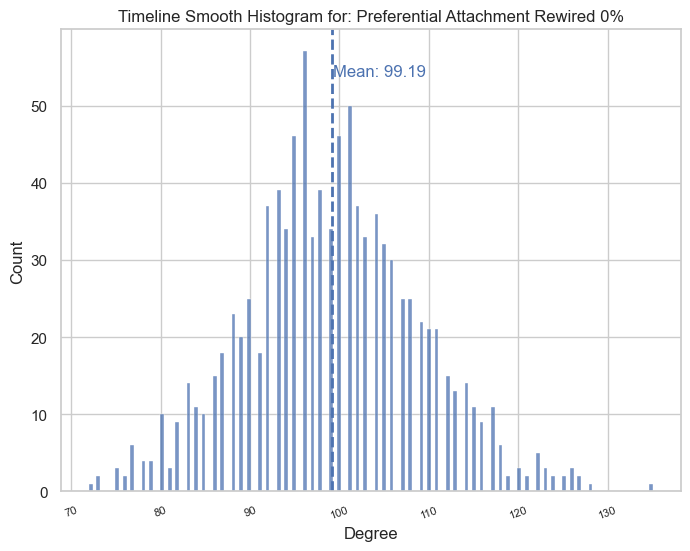

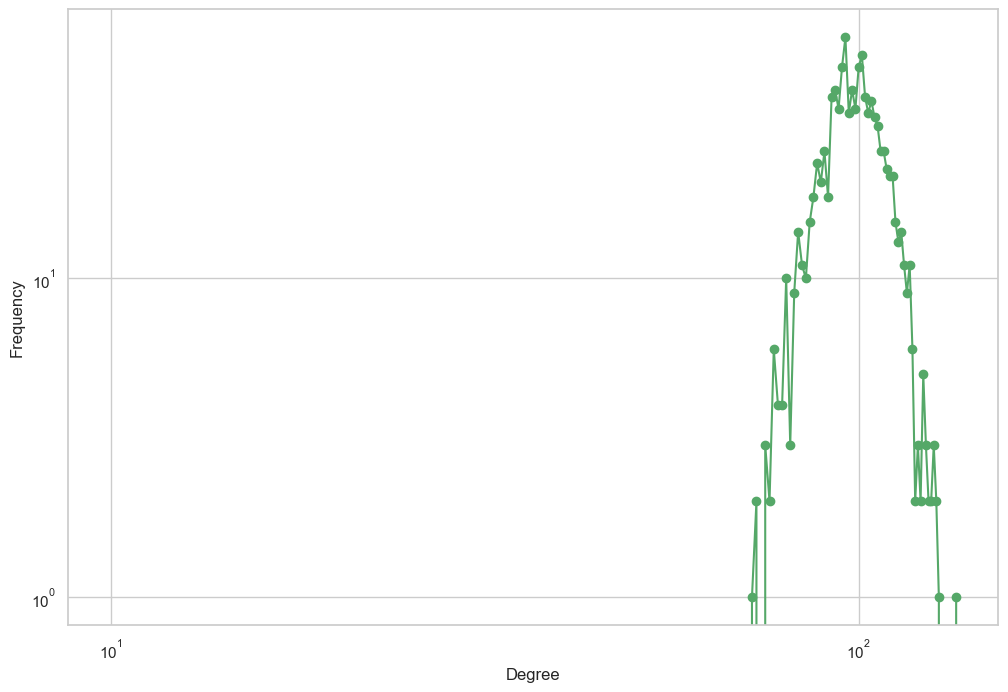

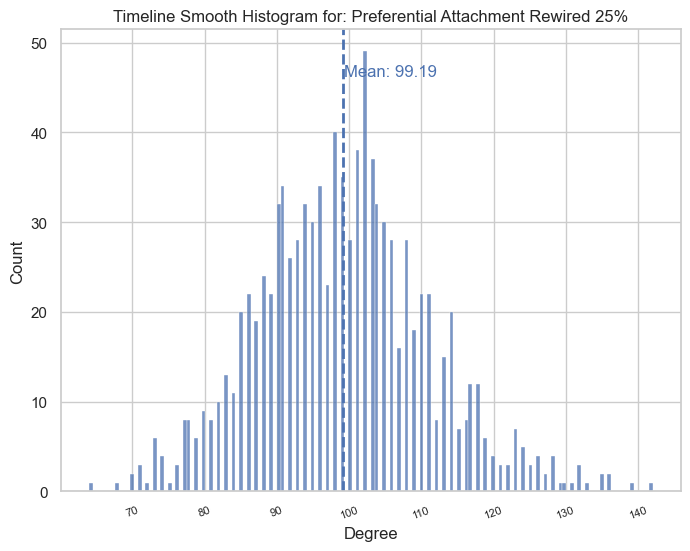

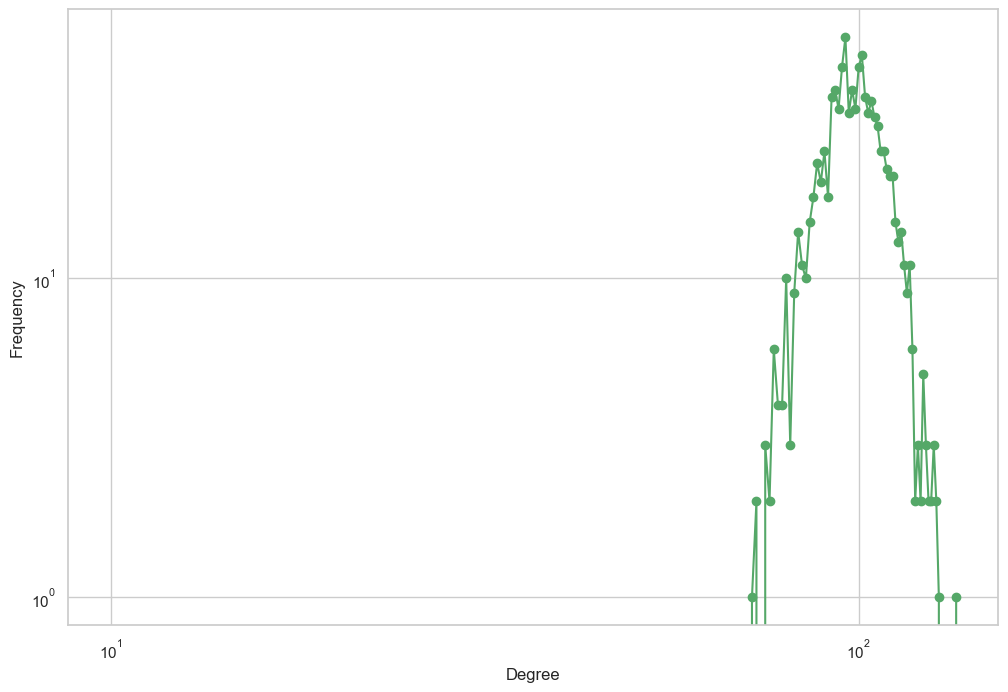

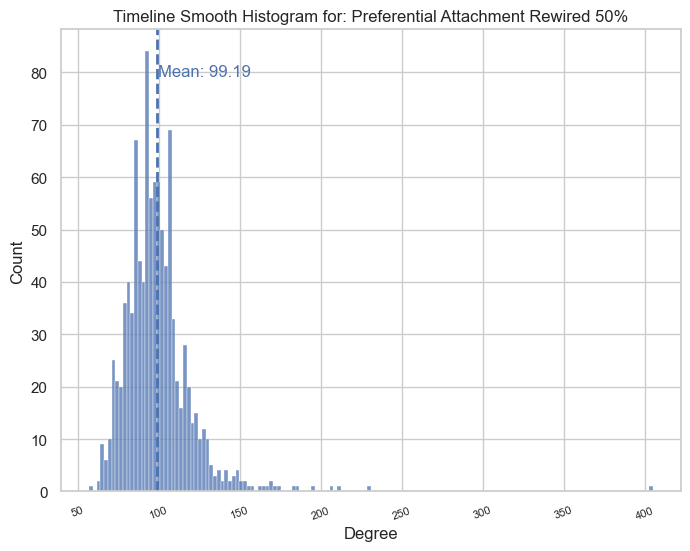

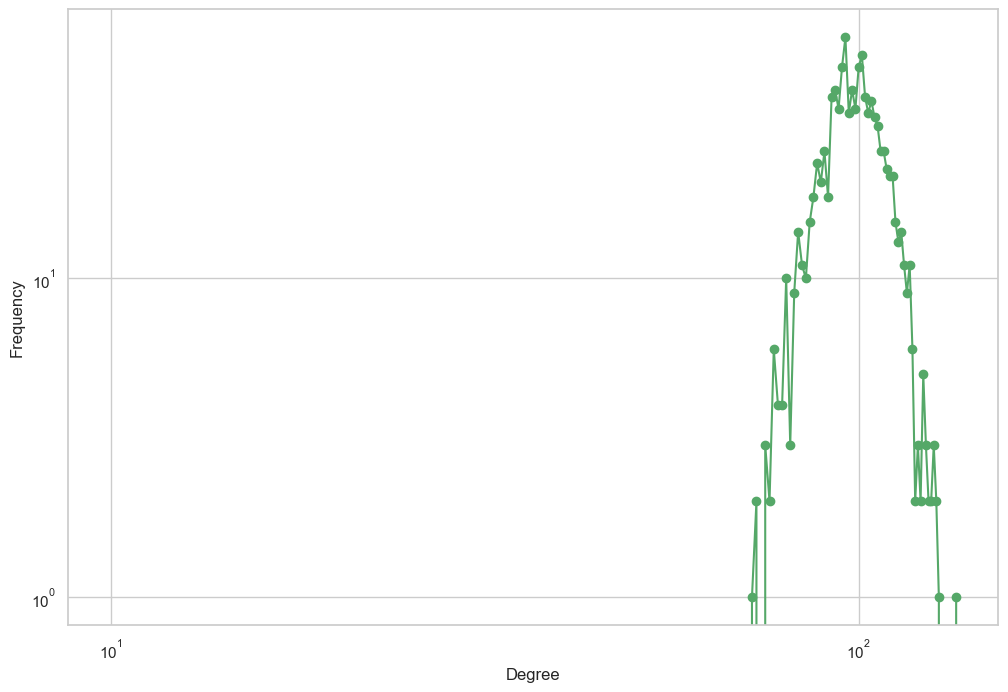

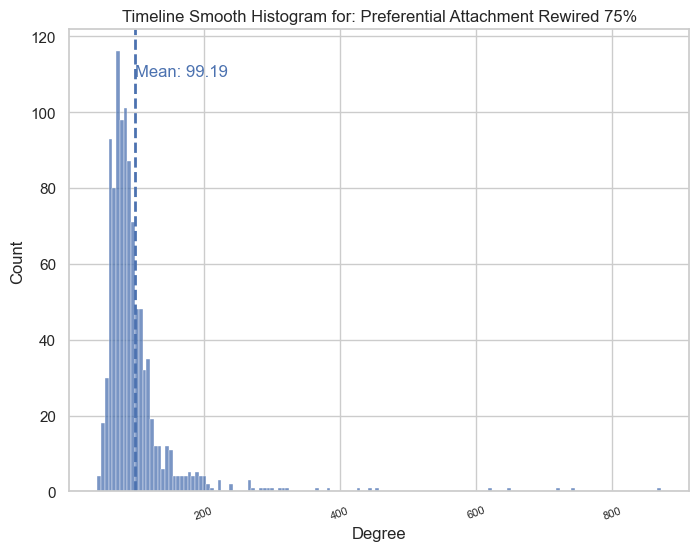

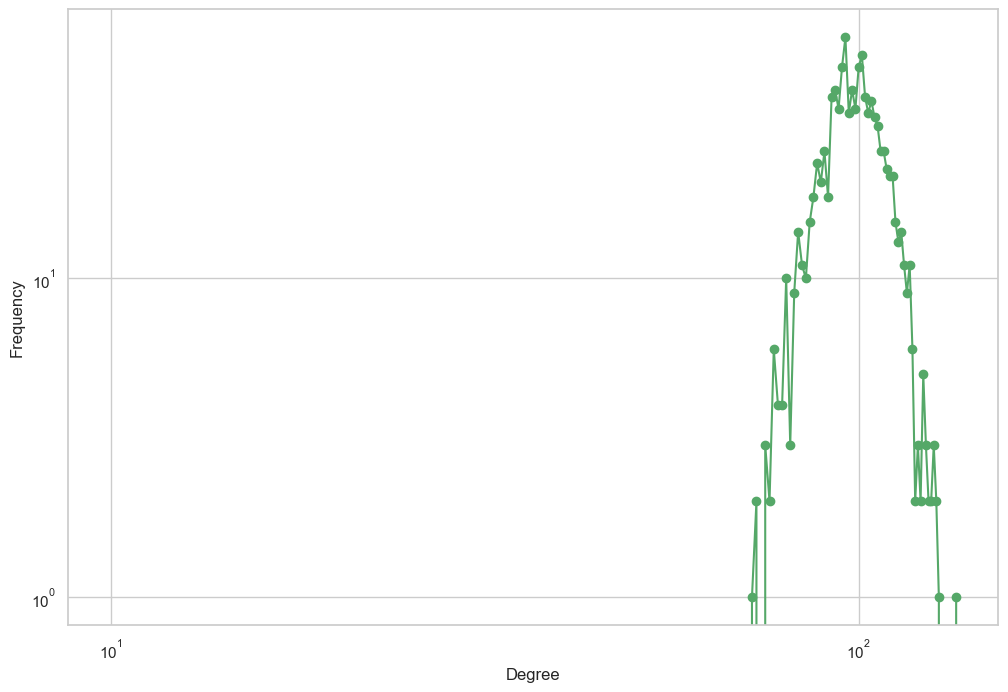

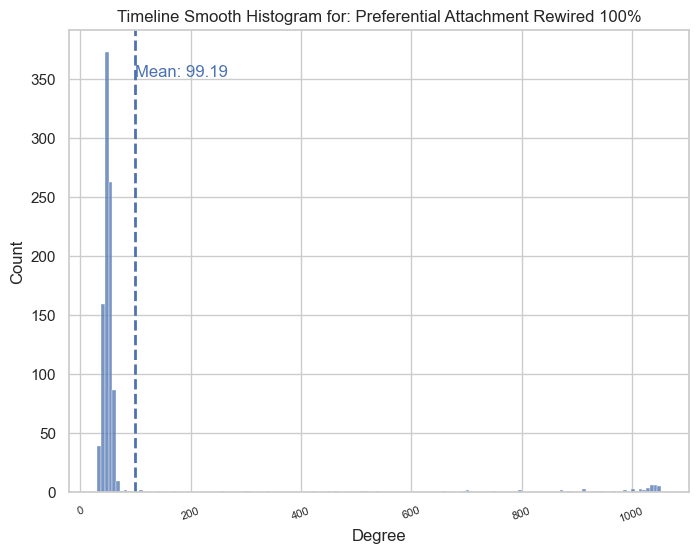

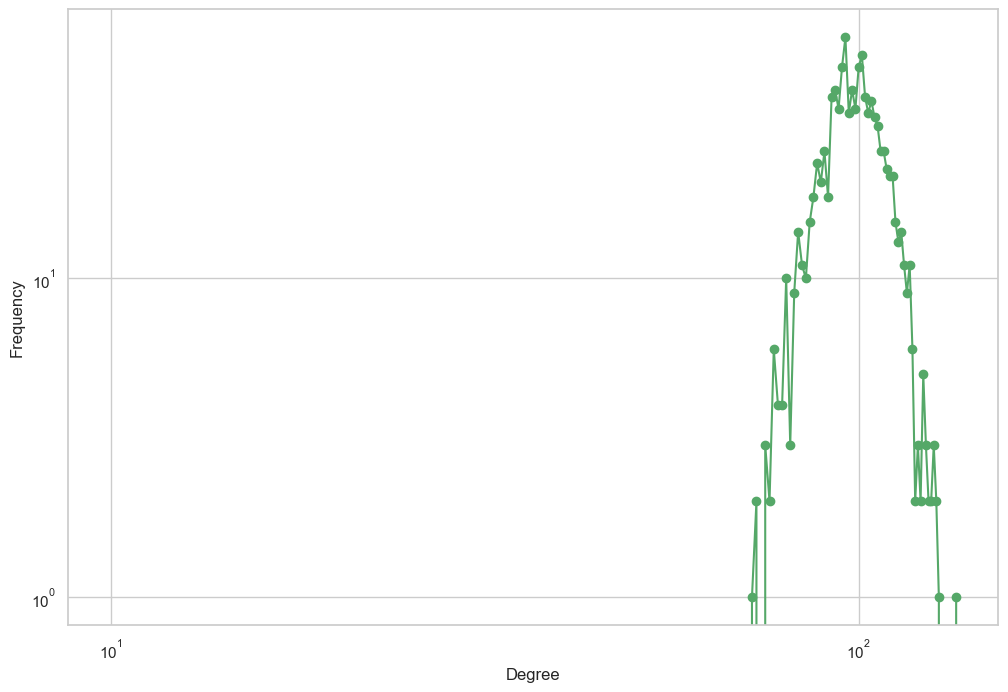

In [27]:
# Create a graph (example graph)
%%time
G_er = nx.gnp_random_graph(1000, 0.05, directed=True)
plot_network_degree_distribution(G_er,'Preferential Attachment Rewired 0%')
plot_loglog(G_er)
G_rewired = rewire_network(G_er, 0.25)
plot_network_degree_distribution(G_rewired,'Preferential Attachment Rewired 25%')
plot_loglog(G_er)
G_rewired = rewire_network(G_er, 0.50)
plot_network_degree_distribution(G_rewired,'Preferential Attachment Rewired 50%')
plot_loglog(G_er)
G_rewired = rewire_network(G_er, 0.75)
plot_network_degree_distribution(G_rewired,'Preferential Attachment Rewired 75%')
plot_loglog(G_er)
G_rewired = rewire_network(G_er, 1)
plot_network_degree_distribution(G_rewired,'Preferential Attachment Rewired 100%')
plot_loglog(G_er)